m(LcD*0) range: 4.293559238087092 → 5.157038129351134 GeV
w: min 0.0006656375987696836 max 1.0


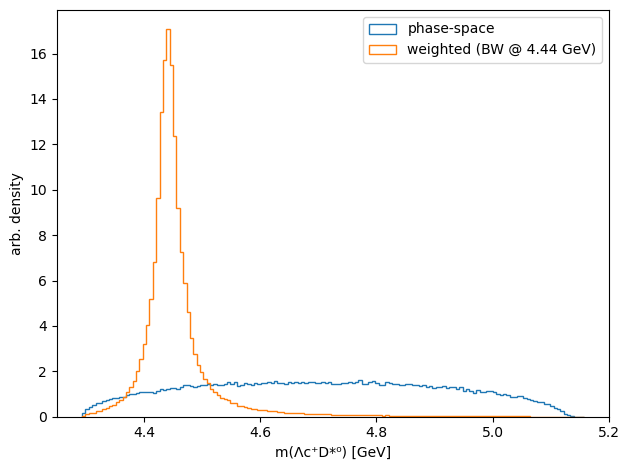

In [4]:
import uproot, numpy as np, pandas as pd, matplotlib.pyplot as plt

# 1) Load phase-space tree and the weights we just made
f  = uproot.open("../data/rapidsim/Lb_LcDst0K_tree.root")
t  = f["DecayTree"]
m  = t["mLcDst"].array(library="np")           # GeV
w  = pd.read_parquet("../data/rapidsim/Lb_LcDst0K_w_mLcDst.parquet")["weight"].to_numpy()

# 2) Sanity: check ranges
print("m(LcD*0) range:", float(m.min()), "→", float(m.max()), "GeV")
print("w: min", float(w.min()), "max", float(w.max()))

# 3) Plot unweighted vs weighted hist to see the BW bump
bins = np.linspace(m.min(), m.max(), 150)
plt.figure(); 
plt.hist(m, bins=bins, histtype="step", label="phase-space", density=True)
plt.hist(m, bins=bins, weights=w/np.mean(w), histtype="step", label="weighted (BW @ 4.44 GeV)", density=True)
plt.xlabel("m(Λc⁺D*⁰) [GeV]"); plt.ylabel("arb. density"); plt.legend(); plt.tight_layout()
plt.show()
